# part4-3
# 교재 197p
# [ 면적 그래프 ]

In [1]:
# part4-3
# 교재 197
# 면적 그래프 
import pandas as pd
import matplotlib.pyplot as plt
# 한글 처리
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)
# 데이터 불러오기
df = pd.read_excel('./data-4/시도별_전출입_인구수.xlsx')
df.head()
# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합부분)
df = df.ffill()
df.head()
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
# 전출지별 열을 삭제하기
df_seoul = df_seoul.drop(['전출지별'], axis=1)
# '전입지별'을 '전입지' 열이름 변경하기
df_seoul = df_seoul.rename({'전입지별': '전입지'}, axis=1)
df_seoul
# 전입지 열을 행 인덱스로 만들기
df_seoul = df_seoul.set_index('전입지')
df_seoul.head()
col_years = list( map(str, range(1970,2018) ) ) # ['1970', '1971']
df_4 = df_seoul.loc[ ['충청남도', '경상북도', '강원도', '전라남도'], col_years ]
df_4

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


In [2]:
# df_4

df_4 = df_4.astype( int )
print(df_4.info())
df_4

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 충청남도 to 전라남도
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1970    4 non-null      int32
 1   1971    4 non-null      int32
 2   1972    4 non-null      int32
 3   1973    4 non-null      int32
 4   1974    4 non-null      int32
 5   1975    4 non-null      int32
 6   1976    4 non-null      int32
 7   1977    4 non-null      int32
 8   1978    4 non-null      int32
 9   1979    4 non-null      int32
 10  1980    4 non-null      int32
 11  1981    4 non-null      int32
 12  1982    4 non-null      int32
 13  1983    4 non-null      int32
 14  1984    4 non-null      int32
 15  1985    4 non-null      int32
 16  1986    4 non-null      int32
 17  1987    4 non-null      int32
 18  1988    4 non-null      int32
 19  1989    4 non-null      int32
 20  1990    4 non-null      int32
 21  1991    4 non-null      int32
 22  1992    4 non-null      int32
 23  1993    4 non-null

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


In [3]:
df_4 = df_4.T
df_4

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314
1975,51205,46177,27837,46610
1976,41447,40376,25927,46251
1977,43993,41155,25415,43430
1978,48091,42940,26700,44624
1979,45388,43565,27599,47934


<class 'matplotlib.axes._axes.Axes'> ~~~~~
<class 'pandas.core.frame.DataFrame'> 888888888


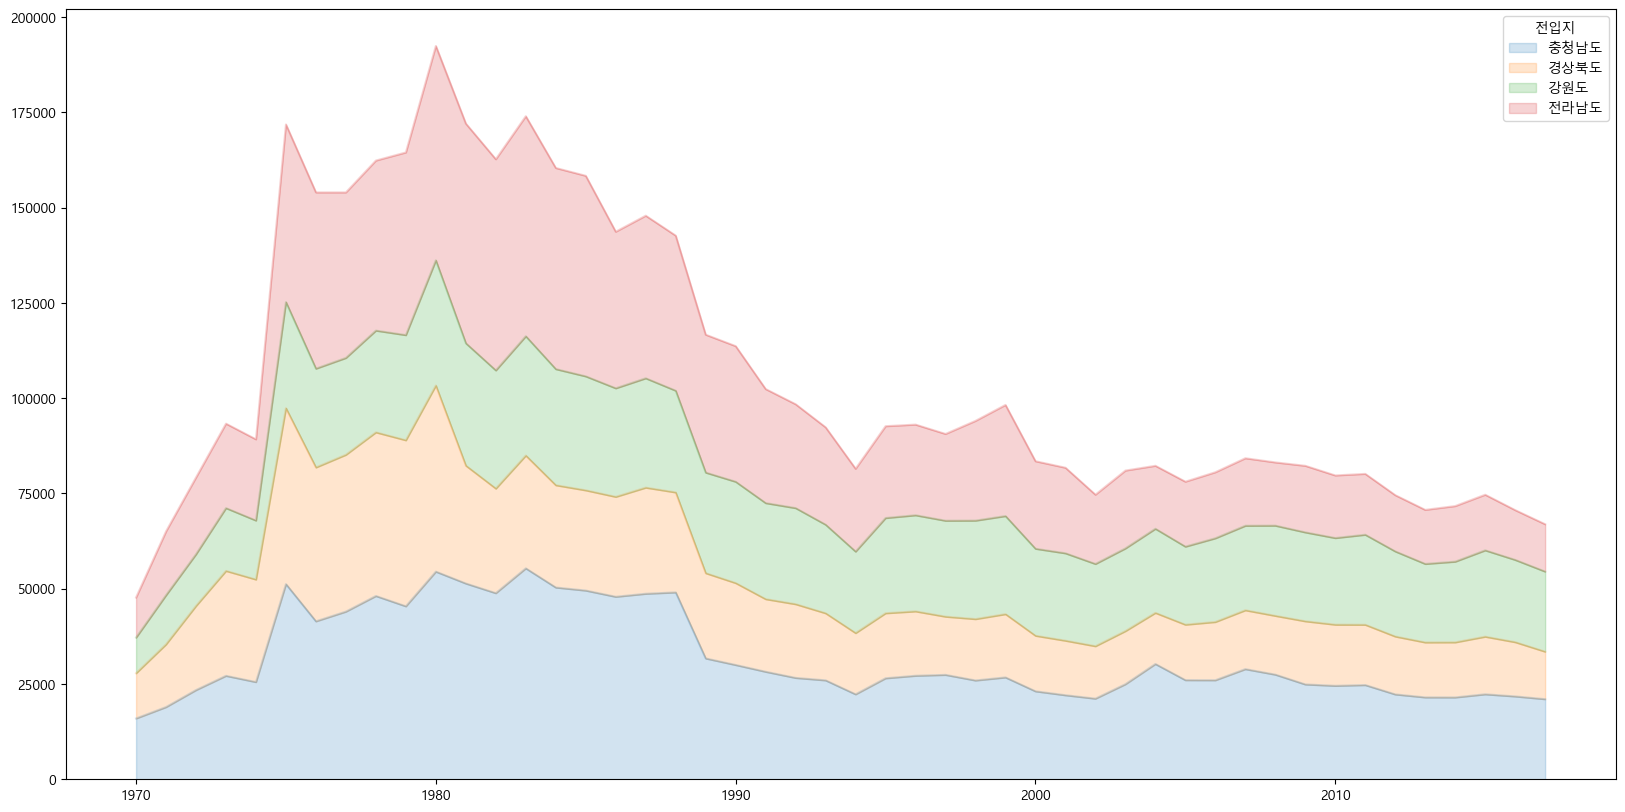

In [4]:
# a = df_4.plot() # 데이터 프레임.plot() - 데이터 프레임의 인덱스를 x축으로, 열들의 값으로 그래프를 그려진다.
# a
# df_4['강원도'].plot()
# df_4[ ['강원도', '전라남도'] ].plot()
ax = df_4.plot( kind='area', stacked=True, alpha=0.2, figsize=(20,10) )
print(type(ax), '~~~~~') # type(알고 싶은 내용)
print ( type(df_4), '888888888' )

# < 예제 4-16 > 202p

전입지    충청남도   경상북도    강원도   전라남도
1970  15954  11868   9352  10513
1971  18943  16459  12885  16755
1972  23406  22073  13561  20157
1973  27139  27531  16481  22160
1974  25509  26902  15479  21314
Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')
Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype='int64') ~~~~~~~~~~~~~~~

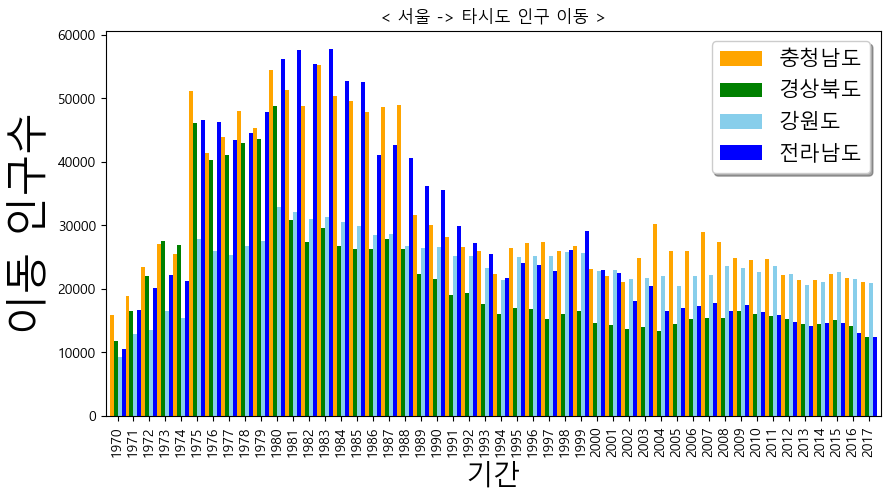

In [5]:

print(df_4.head())
print(df_4.index) # 인덱스 값 출력
df_4.index = df_4.index.map(int) # 교재처럼
print(df_4.index, '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

df_4.plot( kind='bar', figsize=(10,5), width=1,color=['orange','green', 'skyblue', 'blue'] )

plt.title('< 서울 -> 타시도 인구 이동 >')
plt.ylabel('이동 인구수', size = 30)
plt.xlabel('기간', size = 20)
plt.legend( loc='best', fontsize=15, shadow=True )

plt.show()

In [6]:
df_4 = df_4.loc[ [ 1970, 1975,1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015], : ]

전입지    충청남도   경상북도    강원도   전라남도
1970  15954  11868   9352  10513
1975  51205  46177  27837  46610
1980  54480  48839  32858  56251
1985  49520  26297  29911  52629
1990  29993  21490  26591  35589
Index([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015], dtype='int64')
Index([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015], dtype='int64') ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


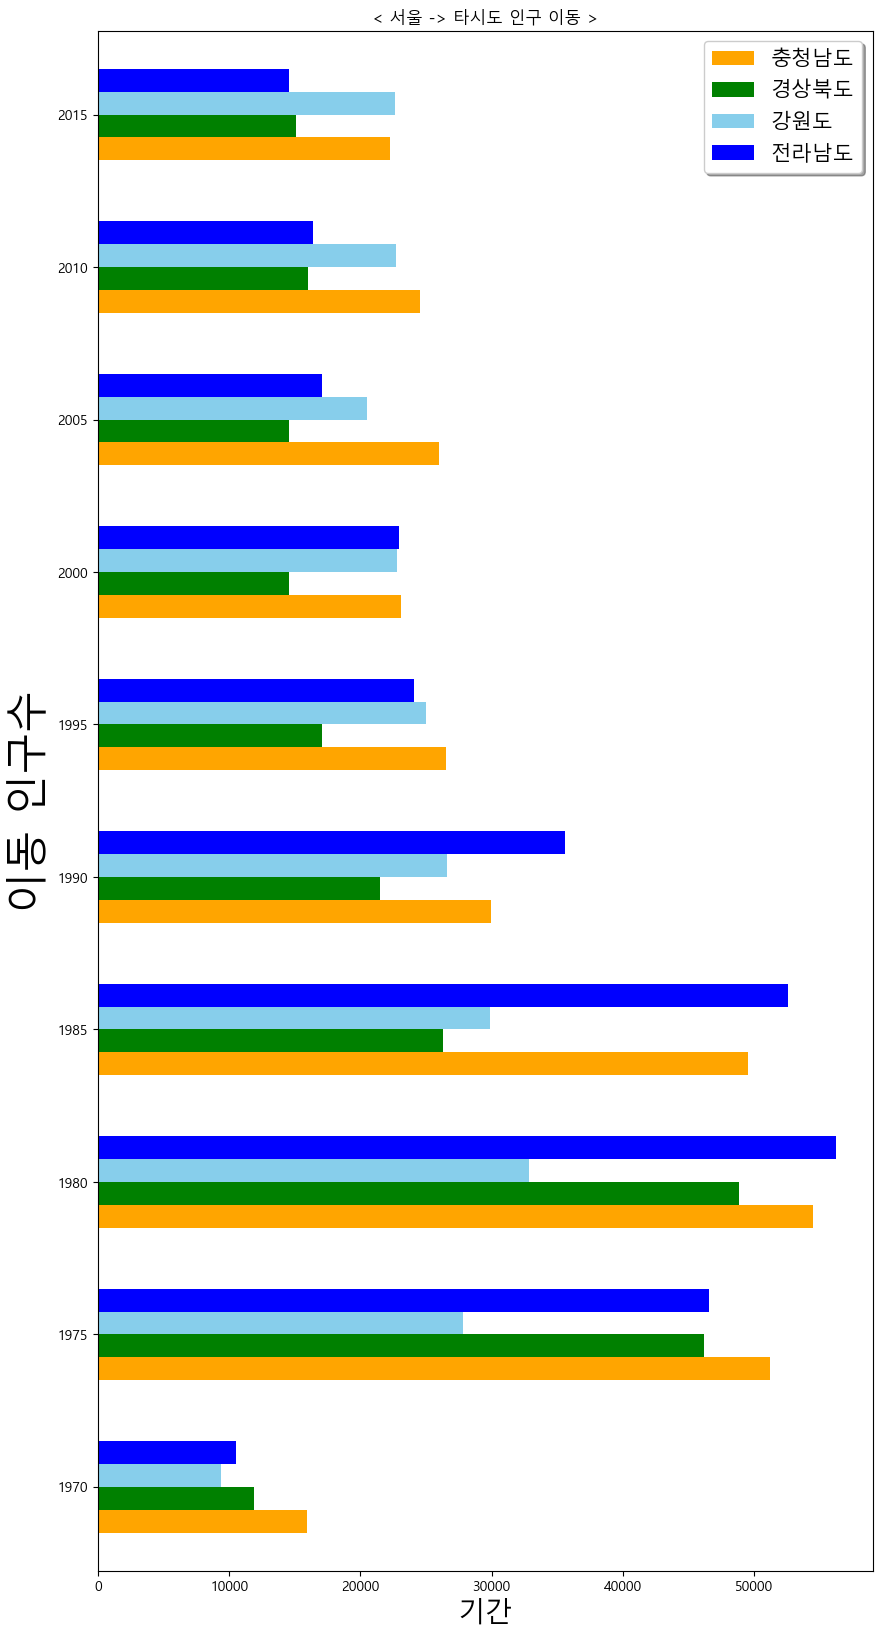

In [7]:

print(df_4.head())
print(df_4.index) # 인덱스 값 출력
df_4.index = df_4.index.map(int) # 교재처럼
print(df_4.index, '~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

'''
df_5 = df_4[df_4.index % 5 == 0]  # 👈 5년 단위로 필터링
'''

df_4.plot( kind='barh', figsize=(10,20), width=0.6,color=['orange','green', 'skyblue', 'blue'] )

plt.title('< 서울 -> 타시도 인구 이동 >')
plt.ylabel('이동 인구수', size = 30)
plt.xlabel('기간', size = 20)
plt.legend( loc='best', fontsize=15, shadow=True )

plt.show()

### 203p

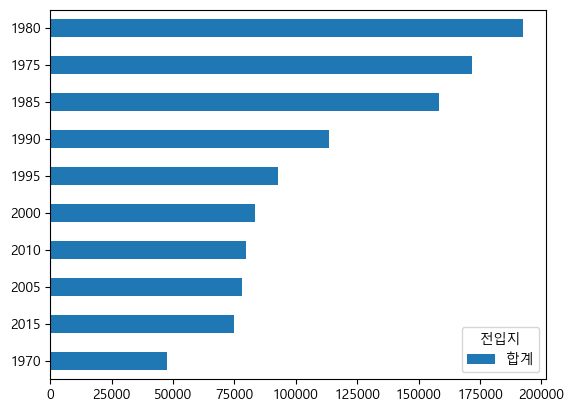

In [8]:
df_4['합계'] = df_4.sum(axis =1) # 열에 대한 합
df_4
# print(df_4.sum(axis=0))
# print(df_4)

df_total = df_4[['합계']].sort_values(by='합계', ascending=True)
df_total
# type(df_total)
df_total.plot( kind='barh' )
plt.show()

# < 예제 4-18 > 205p

In [9]:

# 주축, 보조축

import pandas as pd
import matplotlib.pyplot as plt

# 한글 처리
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

df = pd.read_excel('./data-4/남북한발전전력량.xlsx')
df


df = df.loc[5:9] # 북한 자료만 추출
df.drop( '전력량 (억㎾h)', axis=1, inplace =True )# 열 삭제하기

# df = df.set_index('발전 전력별') 아래 코드와 같다
df.set_index('발전 전력별', inplace=True)
df
# 전치행렬
df = df.T
df


발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [10]:
#  합계 열의 이름을 '총발전량' 열이름 바꾸기
df = df.rename(columns = {'합계':'총발전량'} )
df

# '-' -> 0 : 1단계: '-' -> 문자를 찾아서 다른 문자로 바꿈 -> '0' 2단계 '0' --> 0
for col in df.columns:
    df[col] = df[col].replace('-','0')
df= df.astype(float)
df.info()
df
# df.replace('-',0)
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1990 to 2016
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   총발전량    27 non-null     float64
 1   수력      27 non-null     float64
 2   화력      27 non-null     float64
 3   원자력     27 non-null     float64
dtypes: float64(4)
memory usage: 1.1+ KB


발전 전력별,총발전량,수력,화력,원자력
1990,277.0,156.0,121.0,0.0
1991,263.0,150.0,113.0,0.0
1992,247.0,142.0,105.0,0.0
1993,221.0,133.0,88.0,0.0
1994,231.0,138.0,93.0,0.0
1995,230.0,142.0,88.0,0.0
1996,213.0,125.0,88.0,0.0
1997,193.0,107.0,86.0,0.0
1998,170.0,102.0,68.0,0.0
1999,186.0,103.0,83.0,0.0


In [11]:
#  합계 열의 이름을 '총발전량' 열이름 바꾸기
# df = df.rename( columns = {'합계':'총발전량'} )


df['총발전량-1년'] = df['총발전량'].shift(1) # 한 행씩 아래로 이동하는 것
df['증감율'] = ( (df['총발전량'] / df['총발전량-1년']) -1 ) *100
df

발전 전력별,총발전량,수력,화력,원자력,총발전량-1년,증감율
1990,277.0,156.0,121.0,0.0,NaN,NaN
1991,263.0,150.0,113.0,0.0,277.0,-5.054152
1992,247.0,142.0,105.0,0.0,263.0,-6.083650
1993,221.0,133.0,88.0,0.0,247.0,-10.526316
1994,231.0,138.0,93.0,0.0,221.0,4.524887
1995,230.0,142.0,88.0,0.0,231.0,-0.432900
1996,213.0,125.0,88.0,0.0,230.0,-7.391304
1997,193.0,107.0,86.0,0.0,213.0,-9.389671
1998,170.0,102.0,68.0,0.0,193.0,-11.917098
1999,186.0,103.0,83.0,0.0,170.0,9.411765


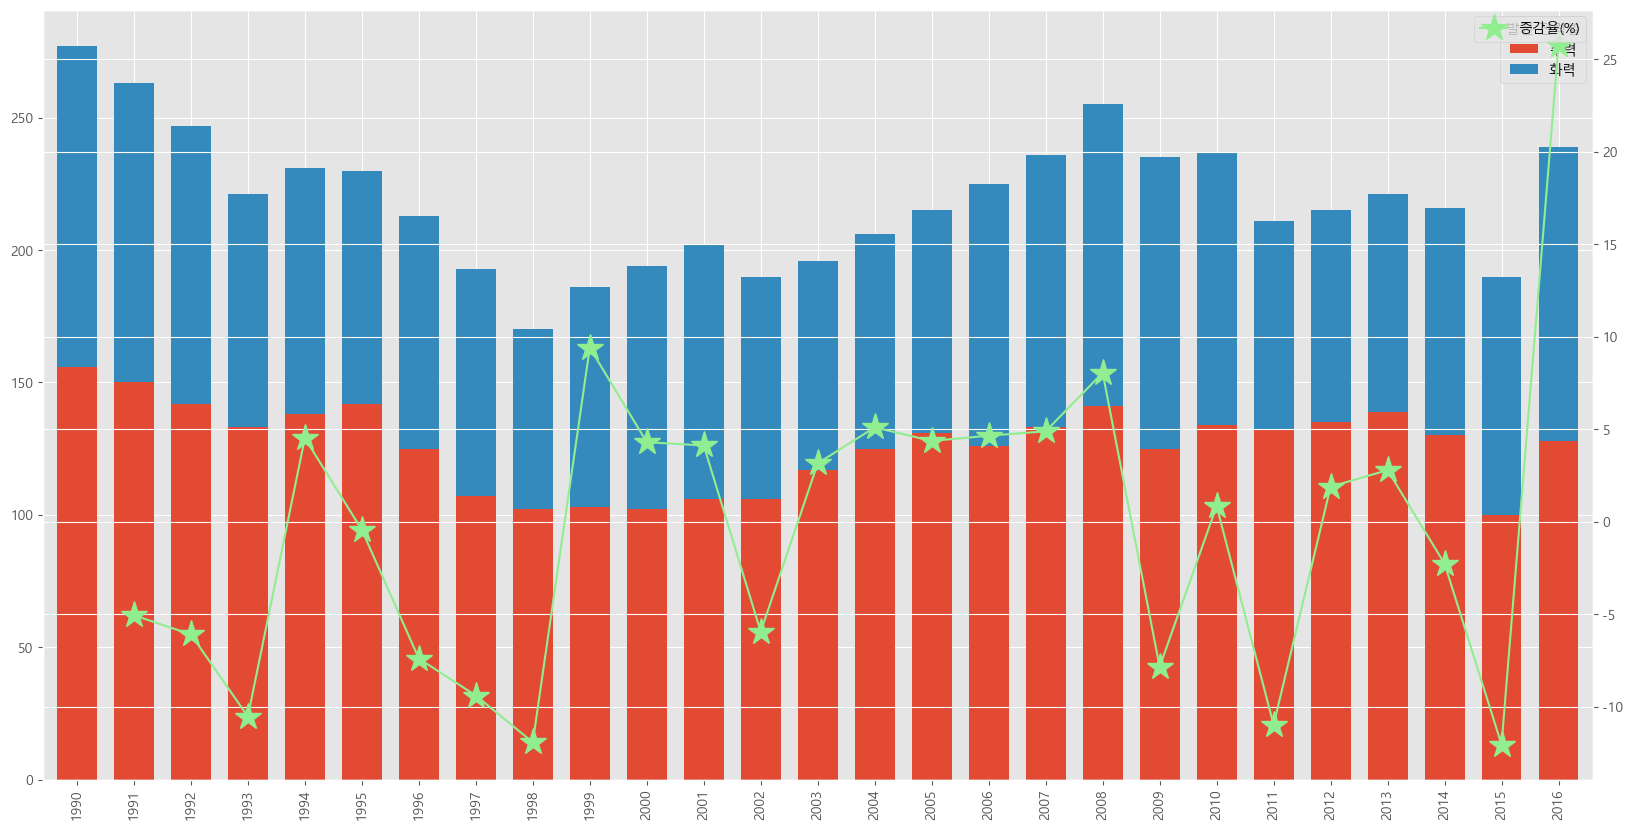

In [12]:
# 2축 그래프 그리기
ax1 = df[ ['수력','화력'] ].plot( kind='bar', figsize=(20,10), width=0.7, stacked = True)
ax2 = ax1.twinx() # x축을 공유하기
ax2.plot( df.index, df.증감율, '*-', markersize=20, color= 'lightgreen', label='증감율(%)' )





plt.legend(loc='best')

plt.show()


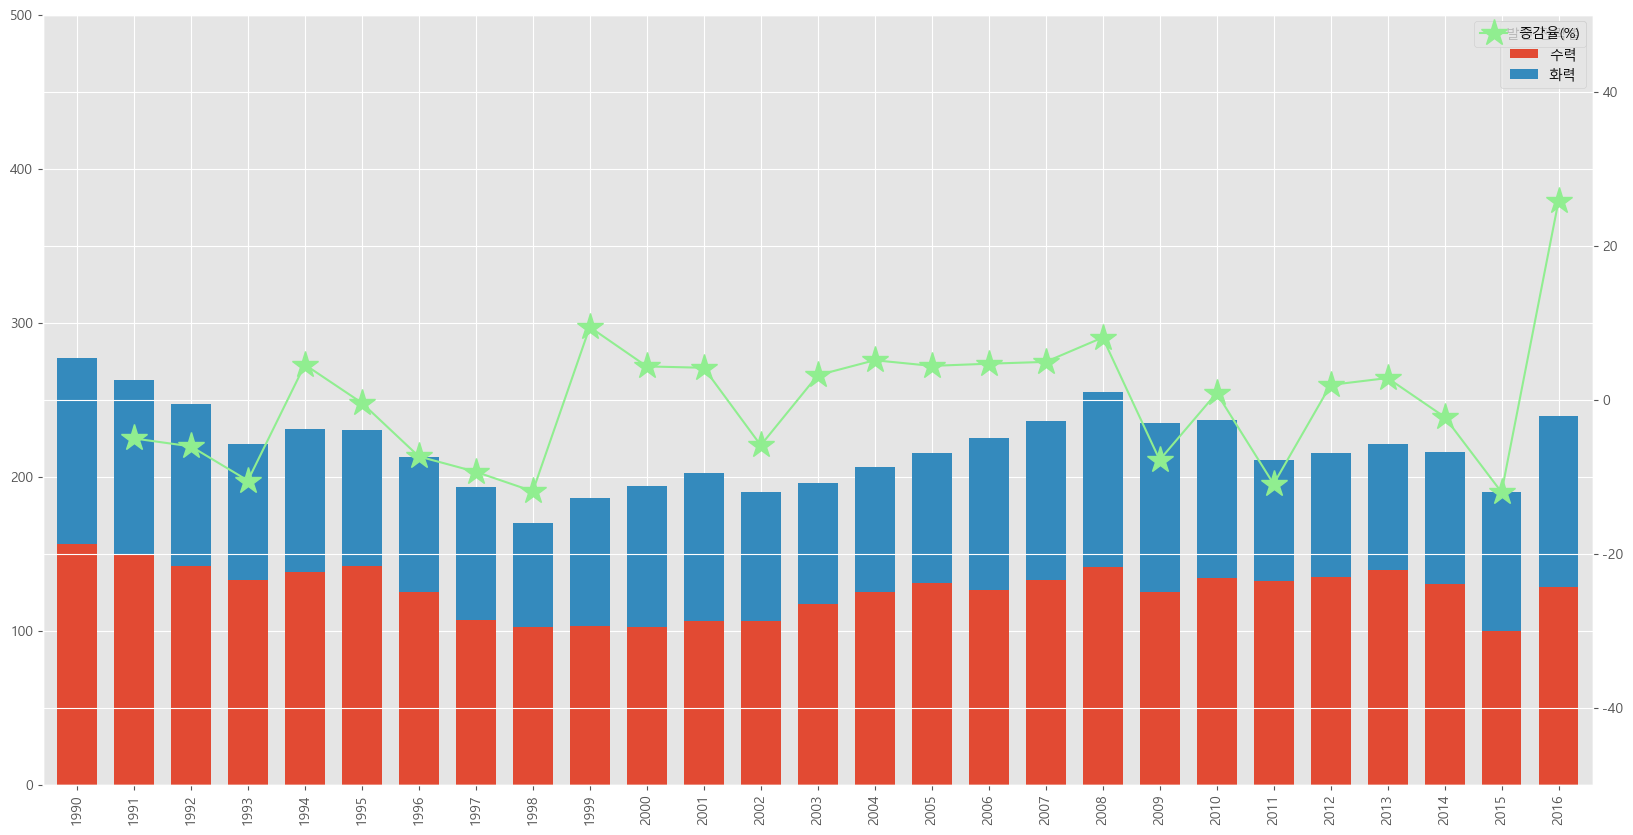

In [13]:
# 2축 그래프 그리기
ax1 = df[ ['수력','화력'] ].plot( kind='bar', figsize=(20,10), width=0.7, stacked = True)
ax2 = ax1.twinx() # x축을 공유하기
ax2.plot( df.index, df.증감율, '*-', markersize=20, color= 'lightgreen', label='증감율(%)' )

ax1.set_ylim( 0, 500 )
ax2.set_ylim( -50, 50 )





plt.legend(loc='best')

plt.show()


ValueError: 'b' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

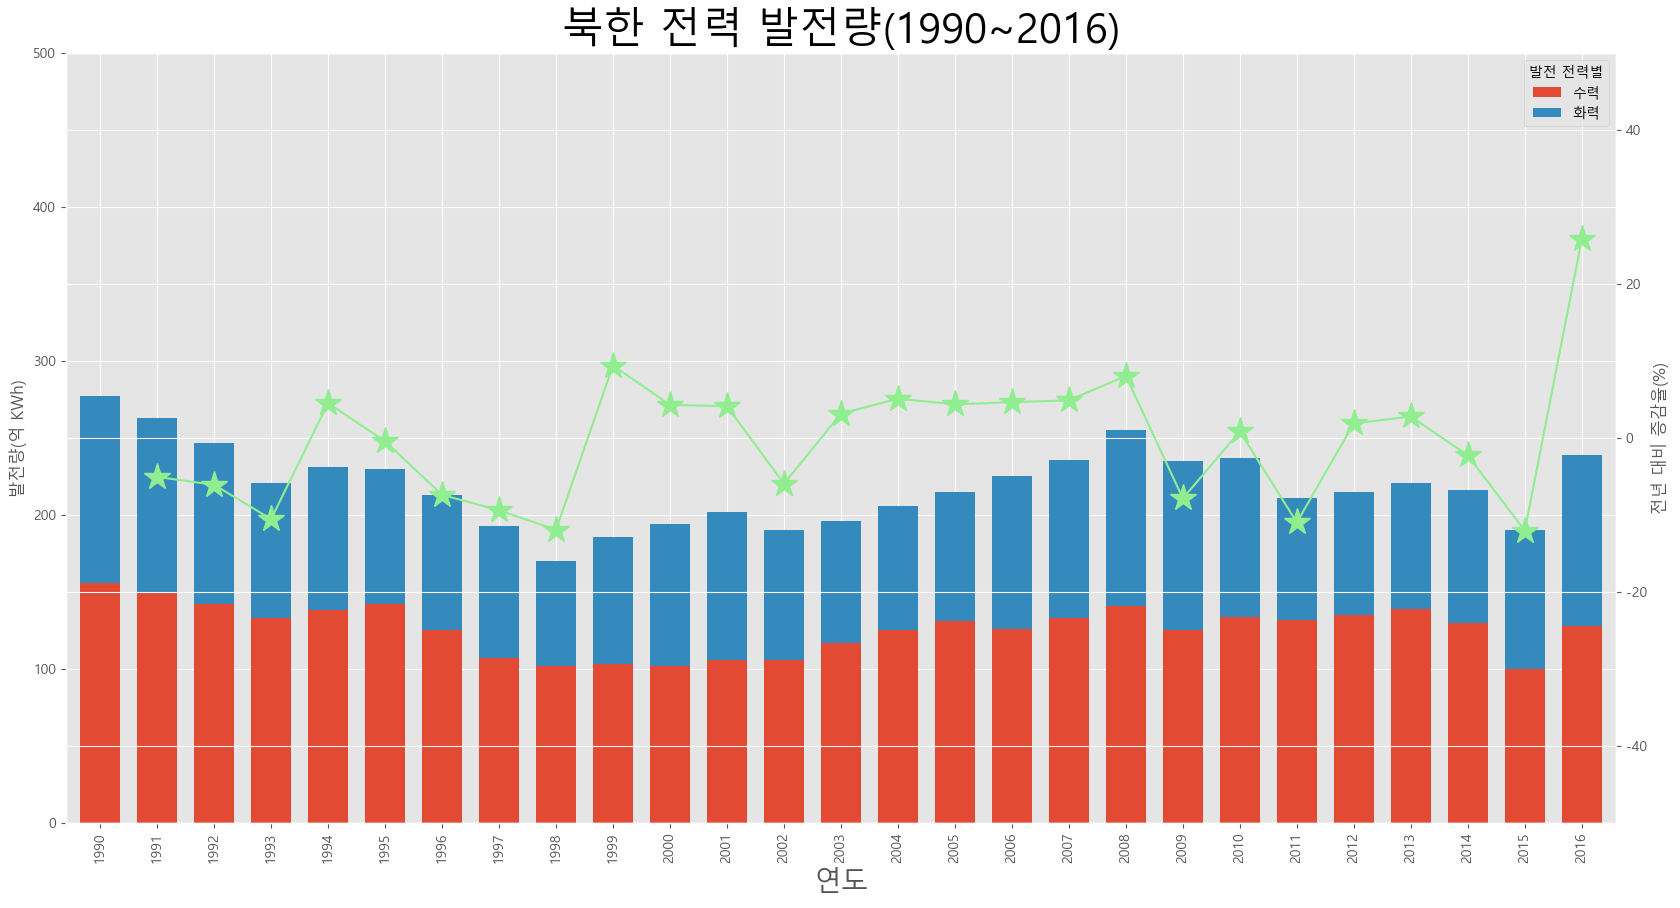

In [14]:
# 2축 그래프 그리기
ax1 = df[ ['수력','화력'] ].plot( kind='bar', figsize=(20,10), width=0.7, stacked = True)
ax2 = ax1.twinx() # x축을 공유하기
ax2.plot( df.index, df.증감율, '*-', markersize=20, color= 'lightgreen', label='증감율(%)' )

ax1.set_ylim( 0, 500 )
ax2.set_ylim( -50, 50 )

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')


plt.title('북한 전력 발전량(1990~2016)', size = 30)



plt.legend(loc='b')

plt.show()


# ---------------------------------------------------------------------

## 남한으로 스스로 다시 학습
### < 남한의 발전량 구하기 >
교재 205~206p 다시 해보기

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [17]:
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False

In [18]:
df1=pd.read_excel('./data-4/남북한발전전력량.xlsx')
df1

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [19]:
df1 = df1.loc[0:4]
df1

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [20]:
df1
df1.drop('전력량 (억㎾h)', axis=1, inplace=True)
df1

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2508\1573822153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('전력량 (억㎾h)', axis=1, inplace=True)


,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,합계,1077,1186,1310,1444,1650,1847,2055,2244,2153,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,수력,64,51,49,60,41,55,52,54,61,...,50,56,56,65,78,77,84,78,58,66
2,화력,484,573,696,803,1022,1122,1264,1420,1195,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,원자력,529,563,565,581,587,670,739,771,897,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,신재생,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [21]:
# df1.drop('전력량 (억㎾h)', axis=1, inplace=True)
df1
df1.set_index('발전 전력별', inplace=True)
df1 = df1.T
df1

발전 전력별,합계,수력,화력,원자력,신재생
1990,1077,64,484,529,-
1991,1186,51,573,563,-
1992,1310,49,696,565,-
1993,1444,60,803,581,-
1994,1650,41,1022,587,-
1995,1847,55,1122,670,-
1996,2055,52,1264,739,-
1997,2244,54,1420,771,-
1998,2153,61,1195,897,-
1999,2393,61,1302,1031,-


In [22]:
for col in df1.columns:
    df1[col] = df1[col].replace('-','0')
df1.info()

df1 = df1.astype(float)
df1

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1990 to 2016
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   합계      27 non-null     object
 1   수력      27 non-null     object
 2   화력      27 non-null     object
 3   원자력     27 non-null     object
 4   신재생     27 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


발전 전력별,합계,수력,화력,원자력,신재생
1990,1077.0,64.0,484.0,529.0,0.0
1991,1186.0,51.0,573.0,563.0,0.0
1992,1310.0,49.0,696.0,565.0,0.0
1993,1444.0,60.0,803.0,581.0,0.0
1994,1650.0,41.0,1022.0,587.0,0.0
1995,1847.0,55.0,1122.0,670.0,0.0
1996,2055.0,52.0,1264.0,739.0,0.0
1997,2244.0,54.0,1420.0,771.0,0.0
1998,2153.0,61.0,1195.0,897.0,0.0
1999,2393.0,61.0,1302.0,1031.0,0.0


In [23]:
# 증감율(변동률) 계산

df1 = df1.rename({'합계':'총발전량'}, axis=1)
df1



발전 전력별,총발전량,수력,화력,원자력,신재생
1990,1077.0,64.0,484.0,529.0,0.0
1991,1186.0,51.0,573.0,563.0,0.0
1992,1310.0,49.0,696.0,565.0,0.0
1993,1444.0,60.0,803.0,581.0,0.0
1994,1650.0,41.0,1022.0,587.0,0.0
1995,1847.0,55.0,1122.0,670.0,0.0
1996,2055.0,52.0,1264.0,739.0,0.0
1997,2244.0,54.0,1420.0,771.0,0.0
1998,2153.0,61.0,1195.0,897.0,0.0
1999,2393.0,61.0,1302.0,1031.0,0.0


In [24]:
df1['총발전량 - 1년'] = df1['총발전량'].shift(1)
df1


발전 전력별,총발전량,수력,화력,원자력,신재생,총발전량 - 1년
1990,1077.0,64.0,484.0,529.0,0.0,NaN
1991,1186.0,51.0,573.0,563.0,0.0,1077.0
1992,1310.0,49.0,696.0,565.0,0.0,1186.0
1993,1444.0,60.0,803.0,581.0,0.0,1310.0
1994,1650.0,41.0,1022.0,587.0,0.0,1444.0
1995,1847.0,55.0,1122.0,670.0,0.0,1650.0
1996,2055.0,52.0,1264.0,739.0,0.0,1847.0
1997,2244.0,54.0,1420.0,771.0,0.0,2055.0
1998,2153.0,61.0,1195.0,897.0,0.0,2244.0
1999,2393.0,61.0,1302.0,1031.0,0.0,2153.0


In [25]:
# 증감율(변동률) 계산

df1['증감율'] = ((df1['총발전량'] / df1['총발전량 - 1년']) -1) * 100

In [ ]:
df1[[ '수력', '화력' ]]

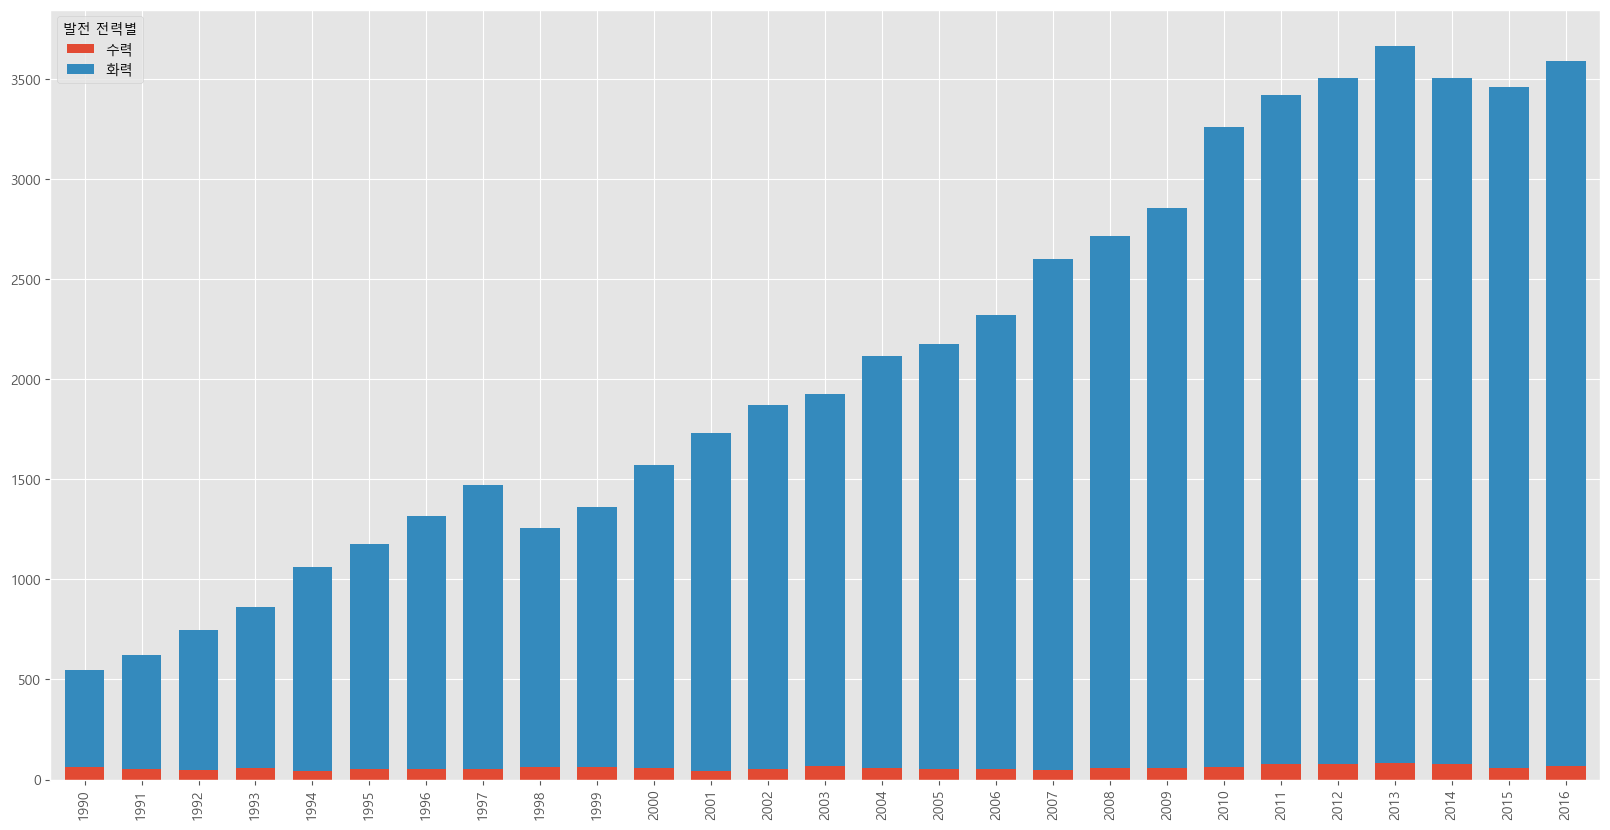

In [28]:
# 2축 그래프 그리기

ax3 = df1[[ '수력', '화력' ]].plot(kind='bar', figsize=(20,10), width=0.7, stacked=True )

In [ ]:
df1.info()

In [ ]:
%matplotlib inline

In [36]:
ax4.plot(df1.index, df1['증감율'], ls='--', marker='o', markersize=10, color='green', label='전년대비 증감율(%)')

plt.show()


In [30]:
ax4 = ax3.twinx()
ax4.plot(  df1.증감율 )
ax4.plot(df1.index, df1.증감율, ls='--', marker='o', markersize=20, color='green', label='전년대비 증감율(%)')


In [31]:
ax3.set_xlabel('연도' , size=20)
ax3.set_ylabel('발전량(억 KWh)')
ax4.set_ylabel('증감률')

Text(0, 0.5, '증감률')

In [32]:
plt.show()

# [ 히스토그램 ]

In [37]:
# 히스토그램 p.207

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')
df3 = pd.read_csv('./data-4/auto-mpg.csv', header=None)
df3

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [39]:
df3.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'accerleration','model year','origin','name']
df3

,mpg,cylinders,displacement,horsepower,weight,accerleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ


<Axes: ylabel='Frequency'>

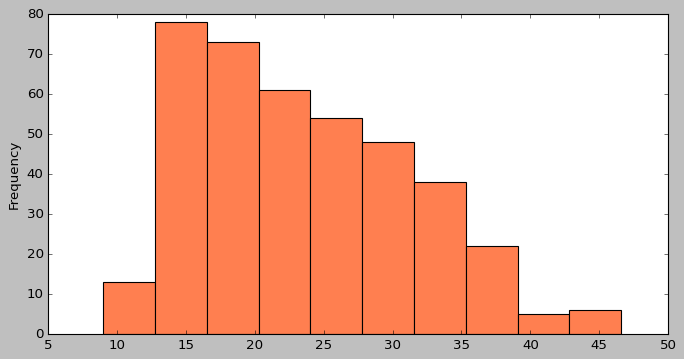

In [50]:
# 연비(mpg) 열에 대한 히스토그램 그리기
print(df3['mpg'])
print('ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ')

df3['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10,5))
# bins는 히스토그램의 가로축 구간의 개수

array([<Axes: title={'center': '(1, 4)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(1, 6)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(1, 8)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(2, 4)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(2, 5)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(2, 6)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(3, 3)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(3, 4)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(3, 6)'}, ylabel='Frequency'>],
      dtype=object)

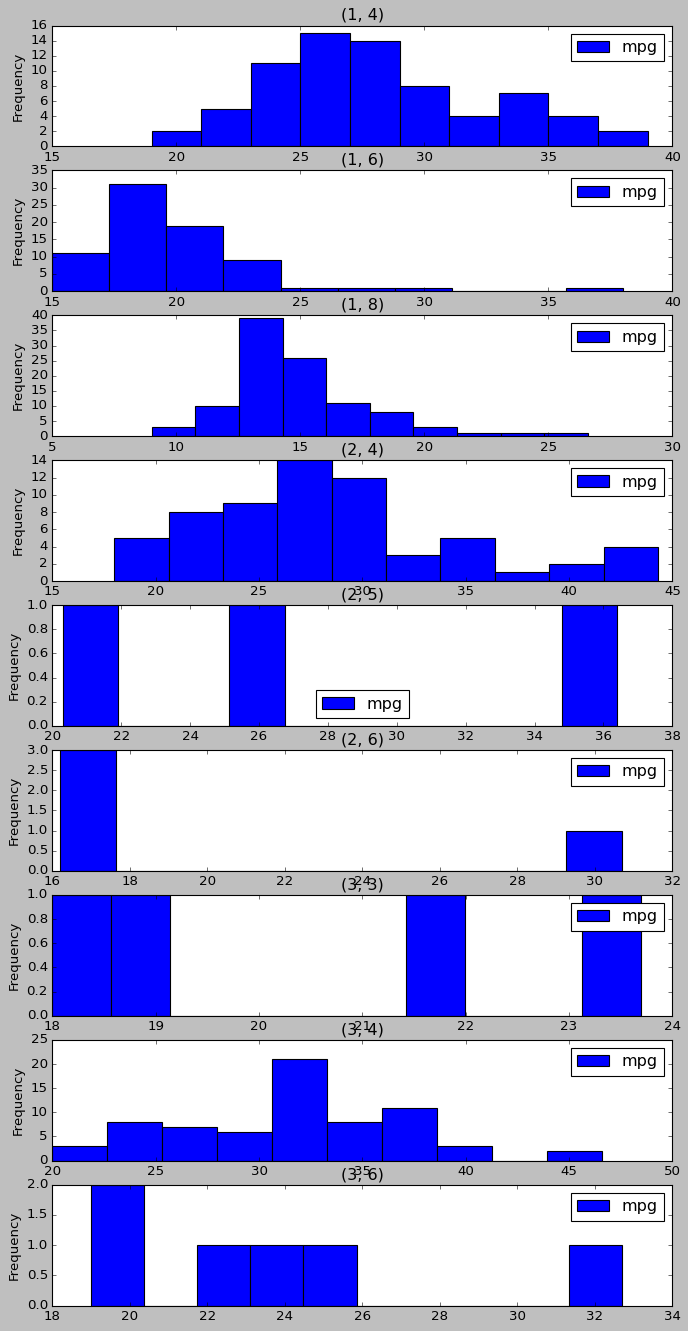

In [64]:
# 208p. 원산지 국가 열을 기준으로 그룹별로 히스토그램 그리기 
df3[['mpg','origin','cylinders']].plot(by=['origin','cylinders'], kind='hist', figsize=(10,20))



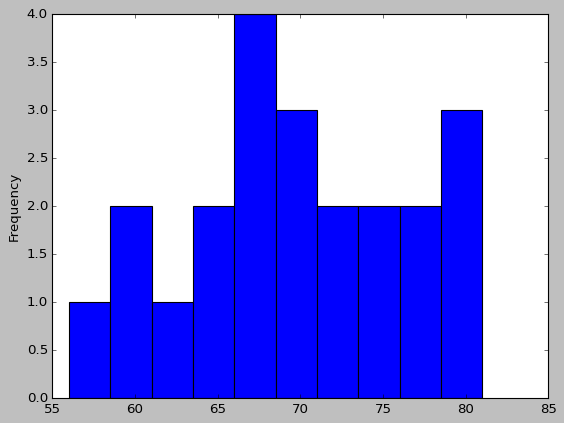

In [52]:
weight = [68, 81, 64, 56, 78, 74, 61, 77, 66, 68, 59, 71,
          80, 59, 67, 81, 69, 73, 69, 74, 70, 65]
#plt.hist(weight)
sr_weight = pd.Series(weight)
sr_weight
sr_weight.plot(kind='hist')
plt.show()